### Analyze which Websites are referenced in the NVD

In [1]:
from pymongo import MongoClient
from urllib.parse import urlparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
mongo_db_name = "nvd"
mongo_client = MongoClient("127.0.0.1")
mongo_db = mongo_client[mongo_db_name]
mongo_collection_name = f"nvd_2021"
mongo_collection = mongo_db[mongo_collection_name]

In [5]:
def get_top_x(year, top:int = 50):
    pipeline = [
        {
            '$unwind': {
                'path': '$reference_data'
            }
        }, {
            '$replaceRoot': {
                'newRoot': {
                    '$mergeObjects': [
                        {
                            '_id': '$_id'
                        }, '$reference_data'
                    ]
                }
            }
        }, {
            '$project': {
                '_id': False,
                'url': True
            }
        }
    ]
    all_reference_urls = list(mongo_db[f'nvd_{year}'].aggregate(pipeline))
    all_reference_domains = list(map(lambda e: urlparse(e['url']).netloc, all_reference_urls))
    df = pd.DataFrame(data=all_reference_domains, columns=['url'])
    df: pd.DataFrame = df.groupby(['url']).size().reset_index(name='count').sort_values(by='count', ascending=False)
    print(f'Total unique urls: {len(df)}')

    df_top_x = df[:top].copy()
    others_row = pd.DataFrame(data= {'url': 'Other', 'count': [df['count'][top:].sum()]})
    df_top_x = pd.concat([df_top_x, others_row])
    print(df_top_x)
    plt.figure(figsize = (40, 12), dpi = 80)
    explode = np.zeros(top + 1)
    explode[-1] = 0.01
    colors = plt.get_cmap('gist_ncar')(np.linspace(0.2, 0.7, len(df_top_x)))
    plt.pie(df_top_x['count'], labels=df_top_x['url'], explode=explode, colors=colors)
    plt.legend()
    plt.show()

    df_top_x.to_csv(f"data/top_{top}_{year}.csv")
    df_top_x.to_excel(f"data/top_{top}_{year}.xlsx")

Total unique urls: 1711
                                url  count
472                      github.com   5802
639         lists.fedoraproject.org   2169
966               support.apple.com   1485
636                lists.apache.org   1149
814       portal.msrc.microsoft.com    889
1685      www.zerodayinitiative.com    842
1136                     wpscan.com    778
1496                 www.oracle.com    765
901             security.netapp.com    651
1051                tools.cisco.com    601
777         packetstormsecurity.com    575
1240                 www.debian.org    564
1493               www.openwall.com    556
638                lists.debian.org    490
514                 helpx.adobe.com    472
941              source.android.com    439
1350                    www.ibm.com    427
404    exchange.xforce.ibmcloud.com    419
899             security.gentoo.org    403
474                      gitlab.com    396
172         cert-portal.siemens.com    355
240                       crbu

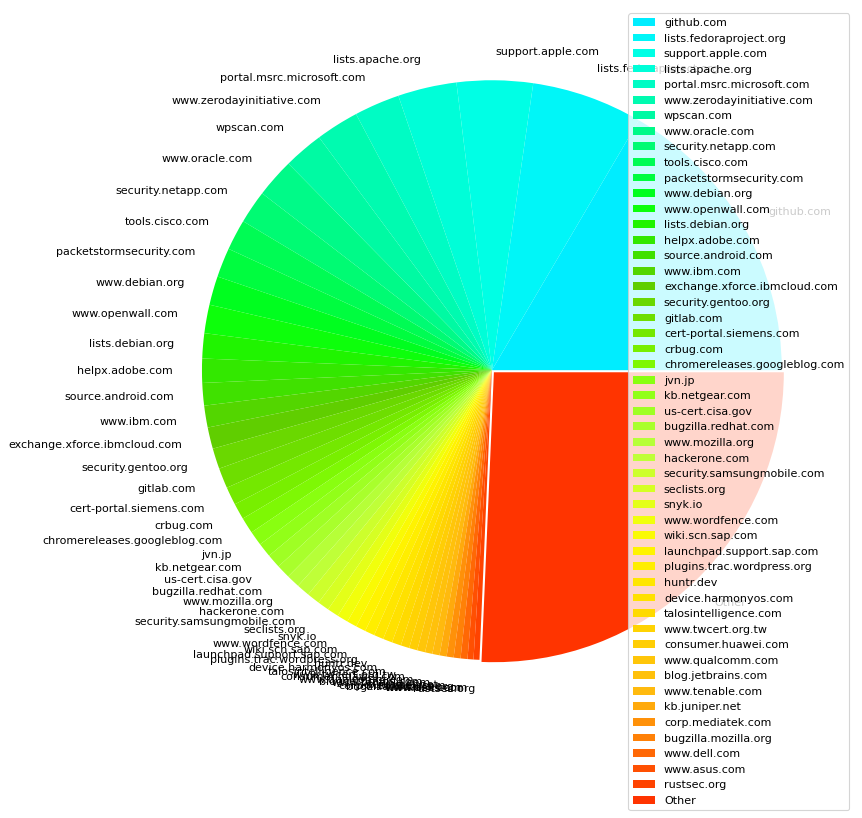

In [6]:
get_top_x(2021, 50)

Total unique urls: 2104
                                url  count
589                      github.com   5473
806         lists.fedoraproject.org   2056
802                lists.apache.org   1716
816              lists.opensuse.org   1471
1217              support.apple.com   1415
1801                 www.oracle.com   1311
1012      portal.msrc.microsoft.com   1256
1123            security.gentoo.org    968
805                lists.debian.org    900
971         packetstormsecurity.com    842
1126            security.netapp.com    791
1536                 www.debian.org    789
1370                 usn.ubuntu.com    747
2058      www.zerodayinitiative.com    679
1799               www.openwall.com    656
491    exchange.xforce.ibmcloud.com    633
1650                    www.ibm.com    628
1114                   seclists.org    545
1179             source.android.com    526
1325                tools.cisco.com    518
212             bugzilla.redhat.com    459
1852               www.qualcom

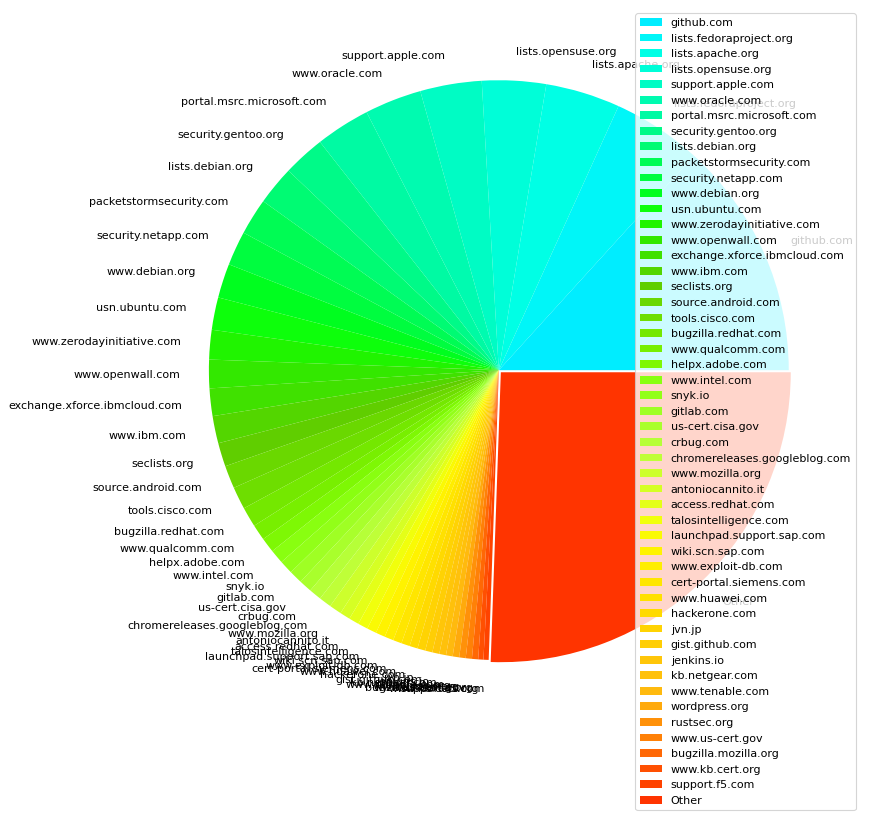

In [7]:
get_top_x(2020, 50)

Total unique urls: 1832
                                url  count
546                      github.com   3807
730              lists.opensuse.org   2128
17                access.redhat.com   1896
720         lists.fedoraproject.org   1808
1653          www.securityfocus.com   1713
1191                 usn.ubuntu.com   1558
1069              support.apple.com   1429
716                lists.apache.org   1424
717                lists.debian.org   1140
1570                 www.oracle.com   1119
854         packetstormsecurity.com   1072
979                    seclists.org   1035
881       portal.msrc.microsoft.com    852
1569               www.openwall.com    717
1352                 www.debian.org    677
996             security.netapp.com    652
1163                tools.cisco.com    589
992             security.gentoo.org    531
1038             source.android.com    506
600                 helpx.adobe.com    479
1083                 support.f5.com    474
448    exchange.xforce.ibmclou

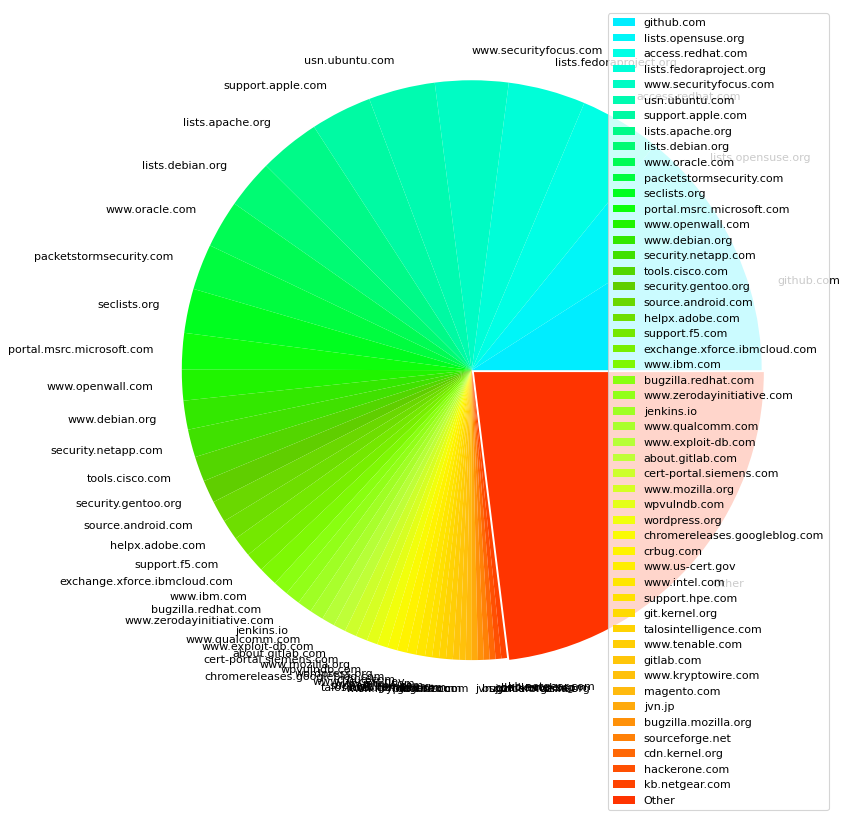

In [8]:
get_top_x(2019, 50)

Total unique urls: 1602
                                url  count
484                      github.com   5199
1458          www.securityfocus.com   4922
24                access.redhat.com   3090
1460        www.securitytracker.com   2803
1062                 usn.ubuntu.com   1979
647                lists.debian.org   1359
965               support.apple.com   1237
1382                 www.oracle.com   1168
1238             www.exploit-db.com   1074
1202                 www.debian.org   1035
883                    seclists.org    837
645                lists.apache.org    833
897             security.gentoo.org    746
814       portal.msrc.microsoft.com    709
781         packetstormsecurity.com    690
660              lists.opensuse.org    672
405    exchange.xforce.ibmcloud.com    563
1281                    www.ibm.com    511
1040                tools.cisco.com    482
535                 helpx.adobe.com    479
898             security.netapp.com    438
649         lists.fedoraprojec

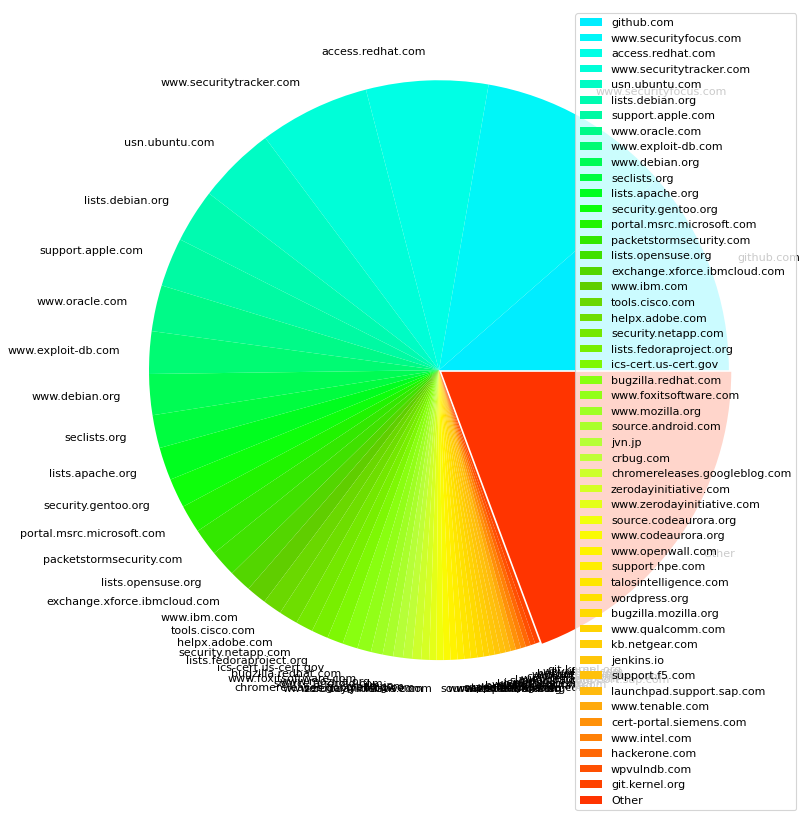

In [9]:
get_top_x(2018, 50)

Total unique urls: 1433
                                url  count
1310          www.securityfocus.com   7482
1311        www.securitytracker.com   4086
447                      github.com   3351
13                access.redhat.com   2421
1066                 www.debian.org   1559
866               support.apple.com   1421
808             security.gentoo.org   1262
1096             www.exploit-db.com   1165
842              source.android.com   1159
1247                 www.oracle.com   1062
584                lists.debian.org    829
961                  usn.ubuntu.com    815
581                lists.apache.org    728
728       portal.msrc.microsoft.com    685
366    exchange.xforce.ibmcloud.com    474
792                    seclists.org    466
931                 tools.cisco.com    466
1136                    www.ibm.com    452
697         packetstormsecurity.com    438
1245               www.openwall.com    436
1206                www.mozilla.org    431
197             bugzilla.redha

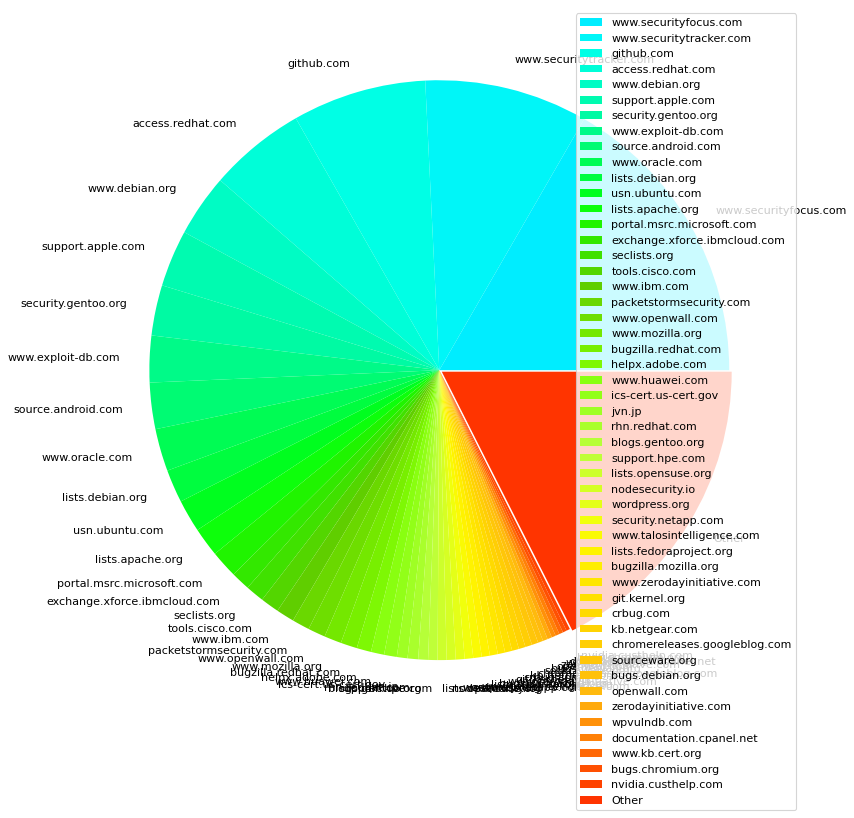

In [10]:
get_top_x(2017, 50)

Total unique urls: 990
                                   url  count
912              www.securityfocus.com   6527
913            www.securitytracker.com   3953
437                 lists.opensuse.org   3434
561                     rhn.redhat.com   1756
866                   www.openwall.com   1618
868                     www.oracle.com   1581
302                         github.com   1480
596                security.gentoo.org   1379
956                     www.ubuntu.com   1350
638                  support.apple.com   1082
763                     www.debian.org   1074
9                    access.redhat.com    983
623                 source.android.com    804
419                    lists.apple.com    731
208                 docs.microsoft.com    648
124                bugzilla.redhat.com    603
428            lists.fedoraproject.org    563
778                 www.exploit-db.com    554
720                     www-01.ibm.com    542
329                    helpx.adobe.com    541
505        

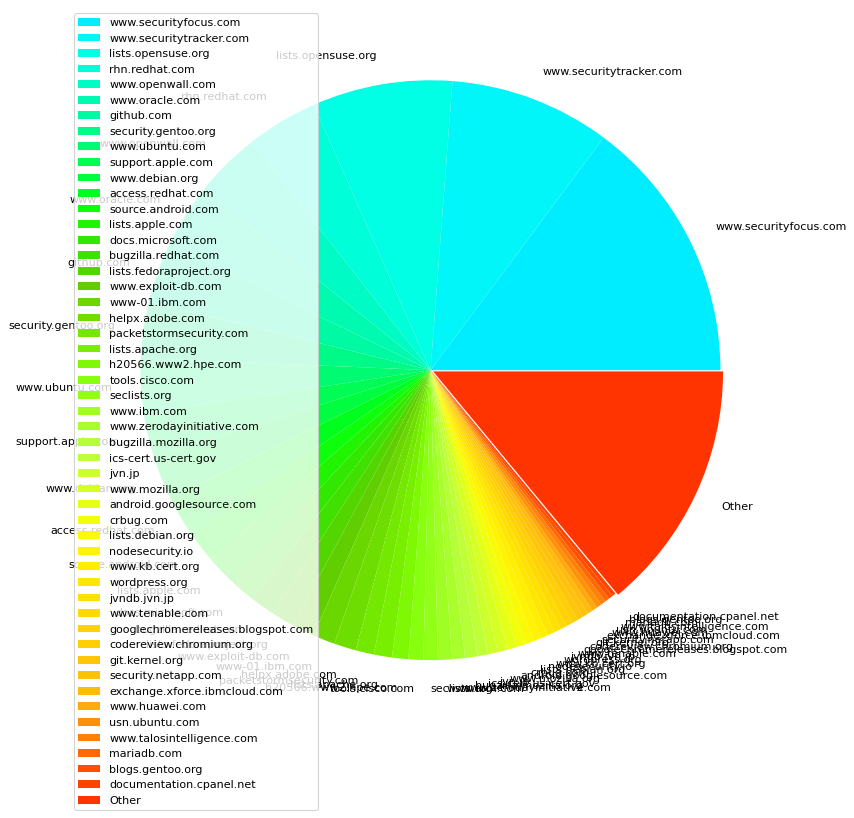

In [11]:
get_top_x(2016, 50)

Total unique urls: 6013
                                url  count
1777                     github.com  25112
5478          www.securityfocus.com  20645
5482        www.securitytracker.com  10842
65                access.redhat.com   8627
3554              support.apple.com   8069
2421             lists.opensuse.org   7930
2398        lists.fedoraproject.org   7222
5213                 www.oracle.com   7006
2382               lists.apache.org   6295
4440                 www.debian.org   5698
3310            security.gentoo.org   5289
3929                 usn.ubuntu.com   5225
2393               lists.debian.org   4934
2982      portal.msrc.microsoft.com   4391
5206               www.openwall.com   4157
2873        packetstormsecurity.com   4067
3457             source.android.com   3699
3276                   seclists.org   3462
4577             www.exploit-db.com   3414
3817                tools.cisco.com   3019
3319            security.netapp.com   2890
4768                    www.ib

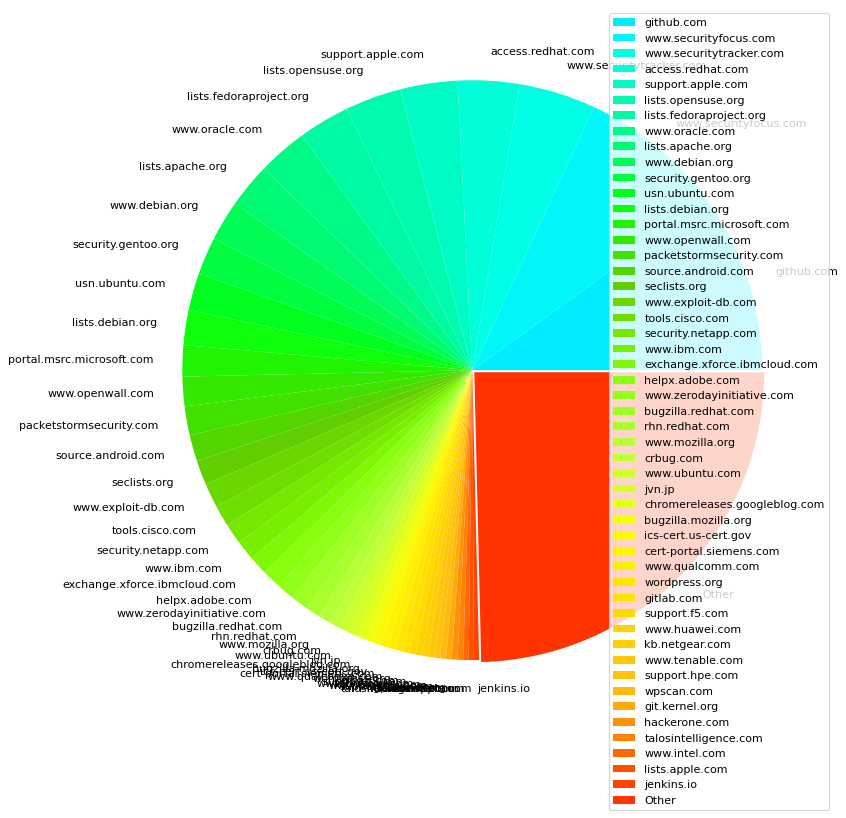

In [14]:
get_top_x("all", 50)

Total unique urls: 6013
                          url  count
1777               github.com  25112
5478    www.securityfocus.com  20645
5482  www.securitytracker.com  10842
65          access.redhat.com   8627
3554        support.apple.com   8069
...                       ...    ...
3608      support.lexmark.com     30
3813        tomcat.apache.org     30
458       blog.nintechnet.com     30
4720        www.hashicorp.com     30
0                       Other  20255

[401 rows x 2 columns]


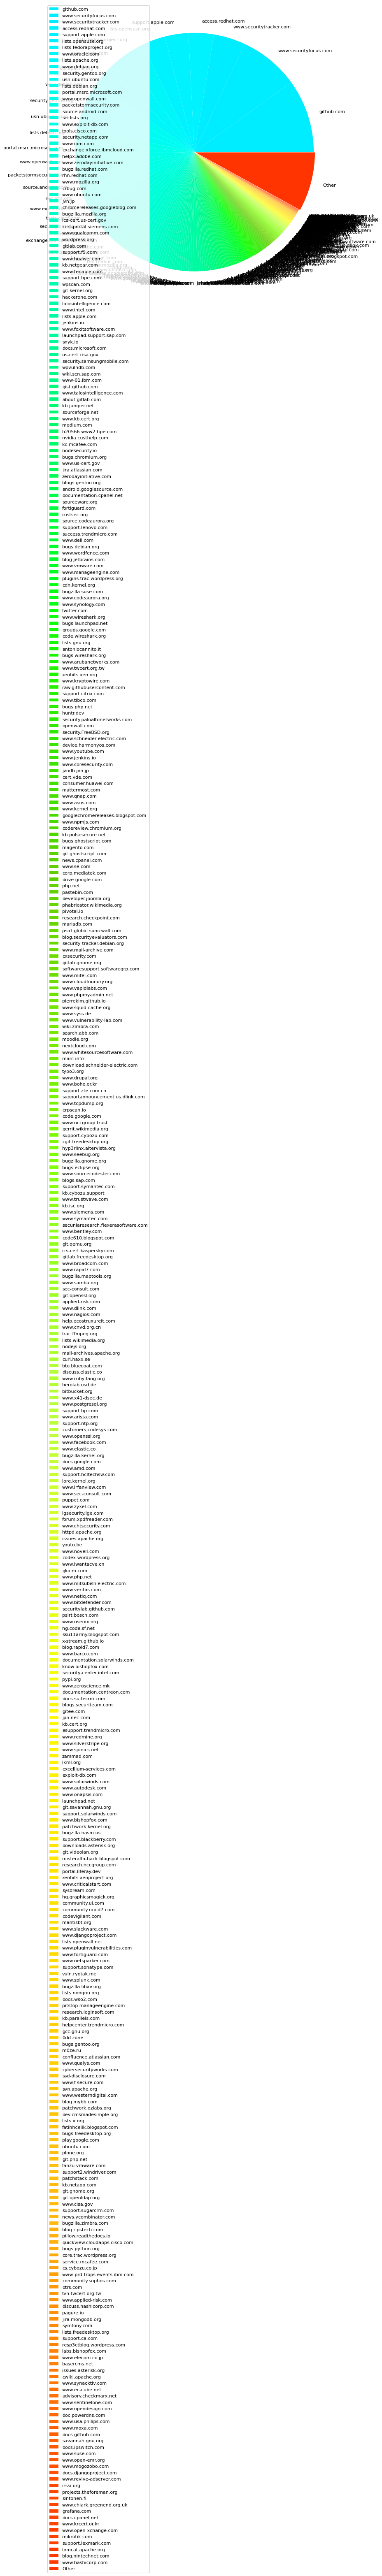

In [13]:
get_top_x("all", 400)